In [91]:
import pandas as pd
import scipy.stats as stats

df=pd.read_csv('Merge_2.csv')

In [92]:
df['거래일자'] = pd.to_datetime(df['거래일자'])

In [93]:
df['거래취소여부'] = df['거래취소여부'].astype('int64')

In [94]:
df['판매금액'] = df['판매금액'].astype('int64') #float64 -> int64

In [95]:
df['서비스가격'] = df['서비스가격'].astype('int64') #float64 -> int64

In [96]:
df['이용자수'] = df['이용자수'].astype('int64') #float64 -> int64

In [97]:
df['서비스번호'] = df['서비스번호'].astype('int64') #float64 -> int64

In [98]:
df['총금액'] = df['총금액'].astype('int64') #float64 -> int64

In [99]:
df['매출'] = df['매출'].astype('int64') #float64 -> int64

In [100]:
df['연령'] = df['연령'].astype('int64') #float64 -> int64

In [101]:
df['총구매금액'] = df['총구매금액'].astype('int64') #float64 -> int64

In [102]:
df['총 판매 금액'] = df['총 판매 금액'].astype('int64') #float64 -> int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335450 entries, 0 to 335449
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   거래일자            335450 non-null  datetime64[ns]
 1   수수료율            335450 non-null  float64       
 2   고객ID            335450 non-null  int64         
 3   프로그램수정횟수        335450 non-null  int64         
 4   추가결제금액          335450 non-null  int64         
 5   거래취소여부          335450 non-null  int64         
 6   서비스명            335450 non-null  object        
 7   판매자             335450 non-null  object        
 8   판매금액            335450 non-null  int64         
 9   서비스가격           335450 non-null  int64         
 10  평점              335450 non-null  float64       
 11  이용자수            335450 non-null  int64         
 12  대분류             335450 non-null  object        
 13  서비스번호           335450 non-null  int64         
 14  총금액             335450 non-null  int

# 2. 수수료율(6.5/7.5/9)에 따라 (서비스 별)거래 취소율에 차이

### H0 : 수수료율에 따라 거래 취소율에 차이가 없다.
### H1 : 수수료율에 따라 거래 취소율에 차이가 있다.

In [104]:
# 대분류 별 그룹화한 거래취소율 => 확인만 함
df_grouped = df.groupby('대분류').agg(
    거래취소율=('거래취소여부', lambda x: (x == 1).mean() * 100),
    판매금액=('판매금액', 'median'),
    서비스가격=('서비스가격', 'median'),
    추가결제금액=('추가결제금액', 'median'),
    총금액=('총금액', 'median'),
    매출=('매출', 'median')
).reset_index()

df_grouped['판매금액'] = df_grouped['판매금액'].round()
df_grouped['서비스가격'] = df_grouped['서비스가격'].round()
df_grouped['추가결제금액'] = df_grouped['추가결제금액'].round()
df_grouped['총금액'] = df_grouped['총금액'].round()
df_grouped['매출'] = df_grouped['매출'].round()

df_grouped['판매금액'] = df_grouped['판매금액'].astype(int)
df_grouped['서비스가격'] = df_grouped['서비스가격'].astype(int)
df_grouped['추가결제금액'] = df_grouped['추가결제금액'].astype(int)
df_grouped['총금액'] = df_grouped['총금액'].astype(int)
df_grouped['매출'] = df_grouped['매출'].astype(int)
df_grouped

,대분류,거래취소율,판매금액,서비스가격,추가결제금액,총금액,매출
0,UnReal,2.593660,56450,55000,0,58000,412500
1,게임,1.045884,11100,5000,0,13800,97500
2,기타,1.678745,20000,11000,1100,25000,162500
3,기획,2.162021,49000,49000,1200,49000,318500
4,데이터,2.187874,20000,20000,0,25000,175500
5,디자인,4.320541,33000,33000,1200,36000,260000
6,모바일,2.132032,51400,50000,0,53800,391500
7,인공지능,2.894356,99000,99000,0,99000,643500
8,커머스,1.824117,10000,5000,0,13000,90000
9,프로그래밍,2.220482,28100,20000,0,30000,215800


In [105]:
# 서비스 번호로 그룹화한 거래취소율
df_grouped = df.groupby('서비스번호').agg(
    거래취소율=('거래취소여부', lambda x: (x == 1).mean() * 100),
).reset_index()

df_grouped

,서비스번호,거래취소율
0,2102,1.259446
1,2103,2.435897
2,2105,2.087683
3,2106,3.602058
4,2107,1.207938
...,...,...
2857,6488,0.000000
2858,6489,0.000000
2859,6494,0.000000
2860,6495,0.000000


In [106]:
# 서비스 번호로 그룹화한 거래취소율 describe
df_grouped = df.groupby('서비스번호').agg(
    거래취소율=('거래취소여부', lambda x: (x == 1).mean() * 100),
).reset_index()

df_grouped.describe()

,서비스번호,거래취소율
count,2862.000000,2862.000000
mean,4303.229909,2.138791
std,1220.920375,6.458416
min,2102.000000,0.000000
25%,3312.250000,0.000000
50%,4286.500000,0.000000
75%,5197.750000,1.425202
max,6496.000000,100.000000


In [107]:
df['거래취소여부'].isnull().sum()

0

In [108]:
df['수수료율_범주'] = pd.cut(df['수수료율'], bins=[0, 6.5, 7.5, 9], labels=['6.5%', '7.5%', '9%'], right=True)

df_grouped = df.groupby('수수료율_범주', observed=False).agg(
    갯수=('거래취소여부', 'size'),
    거래취소율=('거래취소여부', lambda x: (x == 1).mean() * 100)
).reset_index()

df_grouped

,수수료율_범주,갯수,거래취소율
0,6.5%,234765,2.262262
1,7.5%,67104,2.204041
2,9%,33581,2.185760


In [109]:
len(df) # 전체 인스턴스 갯수

335450

In [110]:
df.columns

Index(['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '서비스명', '판매자',
       '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호', '총금액', '매출', '사용기기',
       '사용OS', '유입경로', '회원상태', '거주지', '연령', '서비스총구매수', '총구매금액', '총수정요청수',
       '총추가결제금액', '판매수', '판매자ID', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '수수료율_범주'],
      dtype='object')

In [116]:
from scipy.stats import levene

# 추가결제금액발생여부 그룹 나누기
group_6_5 = df[df['수수료율_범주'] == '6.5%']['거래취소여부']
group_7_5 = df[df['수수료율_범주'] == '7.5%']['거래취소여부']
group_9 = df[df['수수료율_범주'] == '9%']['거래취소여부']

# Levene’s Test 수행
stat, p_value = levene(group_6_5, group_7_5, group_9)

# 결과 출력
print(f"Levene's Test: 통계량={stat:.3f}, p-value={p_value:.5f}")

# 해석
if p_value < 0.05:
    print("귀무가설 기각: 두 그룹의 분산이 다릅니다 (등분산성 없음).")
else:
    print("귀무가설 채택: 두 그룹의 분산이 같습니다 (등분산성 있음).")


Levene's Test: 통계량=0.682, p-value=0.50572
귀무가설 채택: 두 그룹의 분산이 같습니다 (등분산성 있음).


In [111]:
group_6_5 = df[df['수수료율_범주'] == '6.5%']['거래취소여부']
group_7_5 = df[df['수수료율_범주'] == '7.5%']['거래취소여부']
group_9 = df[df['수수료율_범주'] == '9%']['거래취소여부']

# ANOVA 분석: 세 그룹 간 거래 취소율 차이가 있는지 확인
f_statistic, p_value = stats.f_oneway(group_6_5, group_7_5, group_9)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# 유의미한 차이가 있는지 판단
alpha = 0.05  # 95% 신뢰구간
if p_value < alpha:
    print("수수료율 범주에 따라 거래취소율에 유의미한 차이가 있습니다.")
else:
    print("수수료율 범주에 따라 거래취소율에 유의미한 차이가 없습니다.")

F-statistic: 0.6817740222766029
P-value: 0.5057197400901312
수수료율 범주에 따라 거래취소율에 유의미한 차이가 없습니다.


# 2의 파생가설 H1) 수수료율(6.5/7.5/9)에 따라 / 매출에 차이가 있을 것이다.
### p-value 도출 결과 유의미한 차이 있음을 확인

In [122]:
from scipy.stats import levene

group_6_5 = df[df['수수료율_범주'] == '6.5%']['매출']
group_7_5 = df[df['수수료율_범주'] == '7.5%']['매출']
group_9 = df[df['수수료율_범주'] == '9%']['매출']

# Levene’s Test 수행
stat, p_value = levene(group_6_5, group_7_5, group_9)

# 결과 출력
print(f"Levene's Test: 통계량={stat:.3f}, p-value={p_value:.5f}")

# 해석
if p_value < 0.05:
    print("귀무가설 기각: 두 그룹의 분산이 다릅니다 (등분산성 없음).")
else:
    print("귀무가설 채택: 두 그룹의 분산이 같습니다 (등분산성 있음).")


Levene's Test: 통계량=92.360, p-value=0.00000
귀무가설 기각: 두 그룹의 분산이 다릅니다 (등분산성 없음).


In [124]:
import pandas as pd
import pingouin as pg

# 그룹 데이터를 하나의 데이터프레임으로 통합
data = pd.DataFrame({
    '매출': pd.concat([group_6_5, group_7_5, group_9]),
    '수수료율_범주': (['6.5%'] * len(group_6_5)) + 
                   (['7.5%'] * len(group_7_5)) + 
                   (['9%'] * len(group_9))
})

# Welch's ANOVA 수행
anova_result = pg.welch_anova(dv='매출', between='수수료율_범주', data=data)

# F-statistic과 p-value 추출
f_statistic = anova_result['F'].values[0]
p_value = anova_result['p-unc'].values[0]

# 결과 출력 (일반 ANOVA 형식으로)
print(f"F-statistic: {f_statistic:.6f}")
print(f"P-value: {p_value:.6e}")

# 유의미한 차이가 있는지 판단
alpha = 0.05  # 95% 신뢰구간
if p_value < alpha:
    print("수수료율 범주에 따라 매출에 유의미한 차이가 있습니다.")
else:
    print("수수료율 범주에 따라 매출에 유의미한 차이가 없습니다.")

F-statistic: 103.255708
P-value: 1.662310e-45
수수료율 범주에 따라 매출에 유의미한 차이가 있습니다.


In [49]:
# 사후분석 (수수료율 -매출 간 아노바분석)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA 분석을 위해서 데이터가 long format이어야 함
# 데이터 준비: 수수료율 범주별 매출을 사용
df_for_anova = df[['수수료율_범주', '매출']]

# Tukey's HSD 사후 분석
tukey = pairwise_tukeyhsd(endog=df_for_anova['매출'],  # 종속 변수: 매출
                          groups=df_for_anova['수수료율_범주'],  # 그룹: 수수료율 범주
                          alpha=0.05)  # 유의수준 0.05

# 결과 출력
tukey.summary()

# meandiff : 두 그룹 간 평균 매출 차이
# p-adj : 0.05보다 작은 경우, 두 그룹 간 유의미한 차이가 있다고 보는 지표

# 요약
# 수수료율이 높을수록 매출이 증가하는 경향이 나타남
# 세 범주 간에 뚜렷한 매출 차이가 존재함
# 6.5%와 9% 사이의 매출 차이가 가장 큼

group1,group2,meandiff,p-adj,lower,upper,reject
6.5%,7.5%,60502.9171,0.0,41949.3308,79056.5033,True
6.5%,9%,169127.6239,0.0,144399.3636,193855.8842,True
7.5%,9%,108624.7069,0.0,80293.1227,136956.291,True


In [50]:
correlation, p_value = stats.pearsonr(df['수수료율'], df['매출'])

print(f"수수료율과 매출 간 상관계수: {correlation}")
print(f"p-value: {p_value}")

수수료율과 매출 간 상관계수: 0.028962127187354608
p-value: 3.5500723755218946e-63


# 3. 서비스 가격에 따라 (서비스 별)거래 취소율에 차이

### H0 : 서비스 가격에 따라 거래 취소율에 차이가 없을 것이다.
### H1 : 서비스 가격에 따라 거래 취소율에 차이가 있을 것이다.

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.


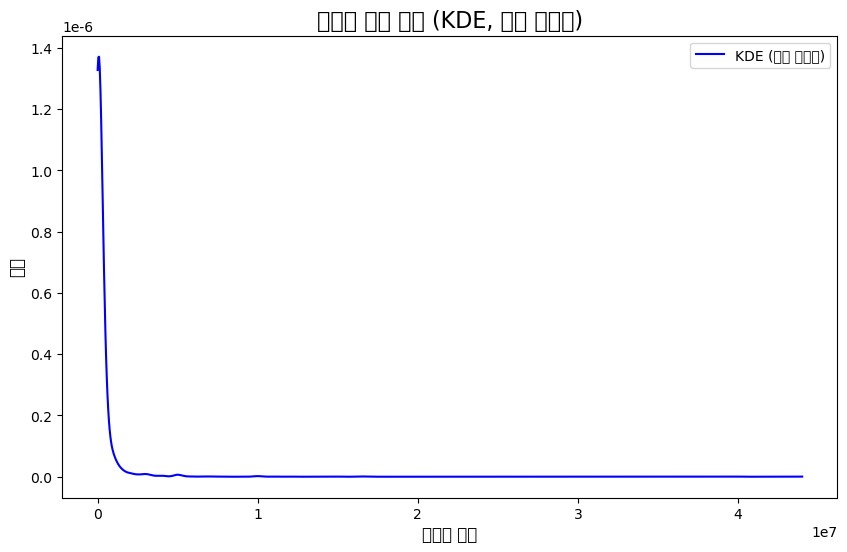

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.signal as signal

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

df=pd.read_csv('Merge_2.csv')
df_service=pd.read_csv('Service_Data.csv')

# NaN 또는 inf 값 제거
data = df_service['서비스가격'].dropna()
data = data[np.isfinite(data)]

# KDE 계산
kde = gaussian_kde(data, bw_method='scott')

# x 값 설정 (범위와 간격 설정)
x = np.linspace(data.min(), data.max(), 1000)

# KDE 값 계산
kde_values = kde(x)

# 그래프 시각화
plt.figure(figsize=(10, 6))

# KDE 그래프 그리기
plt.plot(x, kde_values, color="blue", label="KDE (원본 데이터)")

# 제목 및 레이블
plt.title('서비스 가격 분포 (KDE, 원본 데이터)', fontsize=16)
plt.xlabel('서비스 가격', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.legend()
plt.show()

C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core

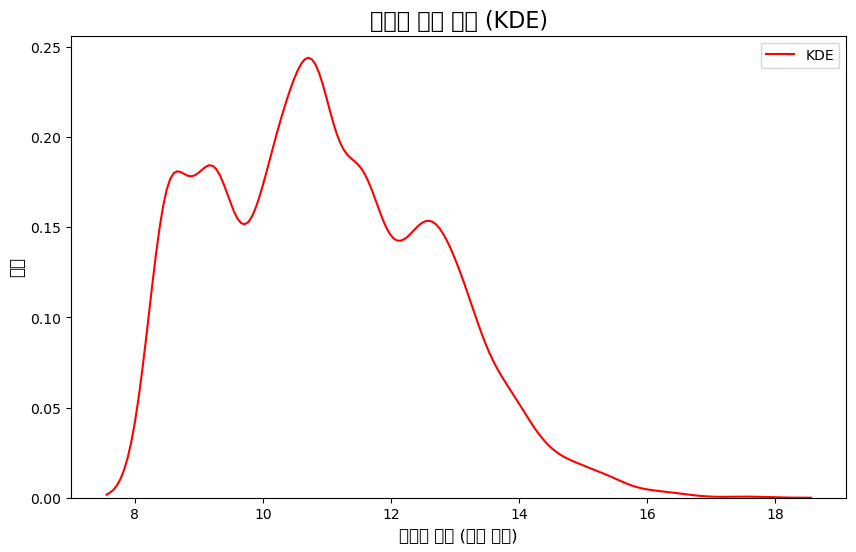

In [52]:
df_service['서비스가격_로그'] = np.log(df_service['서비스가격'])

plt.figure(figsize=(10, 6))

sns.kdeplot(df_service['서비스가격_로그'], color="red", label="KDE")

plt.title('서비스 가격 분포 (KDE)', fontsize=16)
plt.xlabel('서비스 가격 (로그 변환)', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.legend()
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

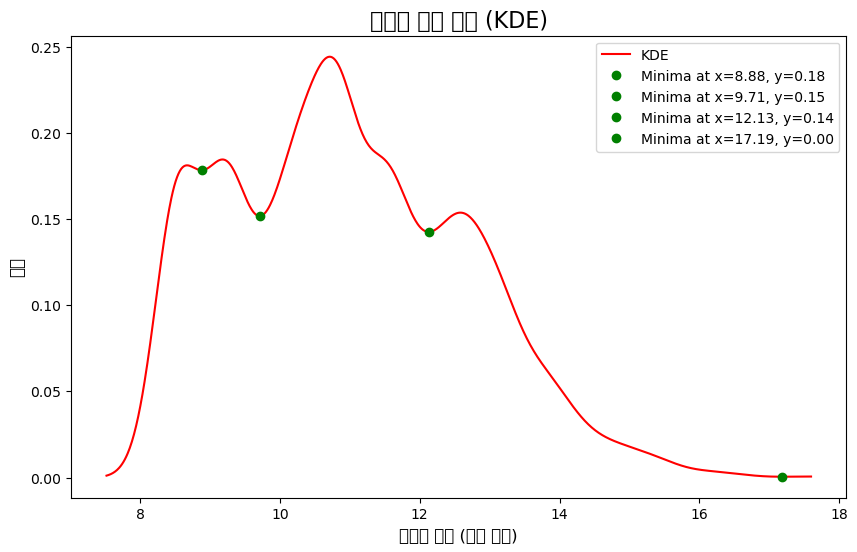

In [53]:
# NaN 또는 inf 값 제거
data = df_service['서비스가격_로그'].dropna()  # NaN 값 제거
data = data[np.isfinite(data)]  # inf 값 제거

# KDE 계산
kde = gaussian_kde(data, bw_method='scott')

# x 값 설정 (범위와 간격 설정)
x = np.linspace(data.min() - 1, data.max(), 1000)

# KDE 값 계산
kde_values = kde(x)

# 최솟값 찾기 (KDE 값의 부호 반전 후 봉우리 찾기)
minima_idx = signal.find_peaks(-kde_values)[0]  # 반전된 값에서 최소값 찾기

# 그래프 시각화
plt.figure(figsize=(10, 6))

# KDE 그래프 그리기
plt.plot(x, kde_values, color="red", label="KDE")

# 최솟값 위치 표시
for idx in minima_idx:
    plt.plot(x[idx], kde_values[idx], 'go', label=f'Minima at x={x[idx]:.2f}, y={kde_values[idx]:.2f}')

# 제목 및 레이블
plt.title('서비스 가격 분포 (KDE)', fontsize=16)
plt.xlabel('서비스 가격 (로그 변환)', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.legend()
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

(로그 처리한)최솟값: x=9.71, y=0.15
(로그 처리한)최솟값: x=12.13, y=0.14


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

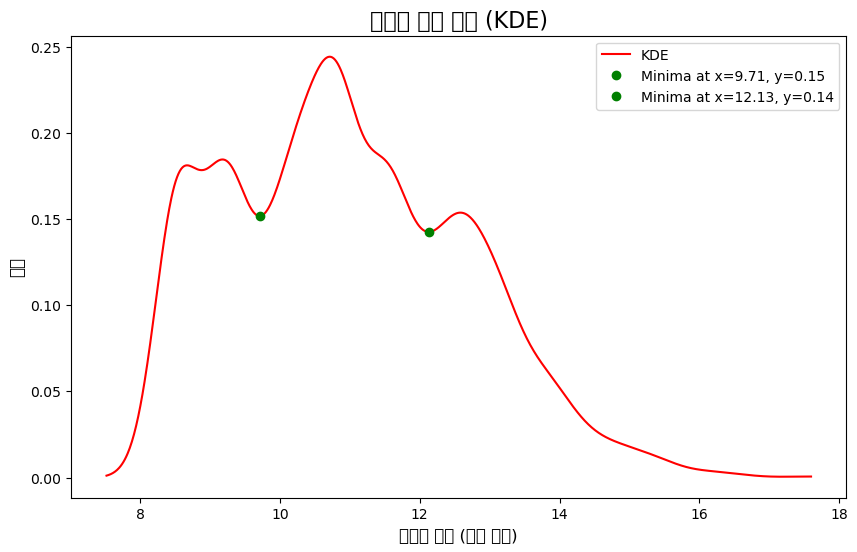


두 번째, 세 번째 최솟값(실제 서비스 가격):
(역로그 처리한)가격=16436.95
(역로그 처리한)가격=185259.20


In [54]:
# 4개의 변곡점 중 가격 범주 선정하기
df_service['서비스가격_로그'] = np.log(df_service['서비스가격'])  # 로그 변환된 컬럼 생성

data = df_service['서비스가격_로그'].dropna()  # NaN 값 제거
data = data[np.isfinite(data)]  # inf 값 제거

# KDE 계산
kde = gaussian_kde(data, bw_method='scott')

# x 값 설정 (범위와 간격 설정)
x = np.linspace(data.min() - 1, data.max(), 1000)

# KDE 값 계산
kde_values = kde(x)

# 최솟값 찾기 (KDE 값의 부호 반전 후 봉우리 찾기)
minima_idx = signal.find_peaks(-kde_values)[0]  # 반전된 값에서 최소값 찾기

# 두 번째, 세 번째 꼭짓점만 출력
if len(minima_idx) >= 3:
    selected_minima_idx = minima_idx[1:3]  # 두 번째, 세 번째 꼭짓점 선택
else:
    selected_minima_idx = minima_idx  # 3개 미만이면 가능한 만큼 선택

# 두 번째, 세 번째 최솟값만 출력
for idx in selected_minima_idx:
    print(f"(로그 처리한)최솟값: x={x[idx]:.2f}, y={kde_values[idx]:.2f}")

# 그래프 시각화
plt.figure(figsize=(10, 6))

# KDE 그래프 그리기
plt.plot(x, kde_values, color="red", label="KDE")

# 두 번째, 세 번째 꼭짓점 위치 표시
for idx in selected_minima_idx:
    plt.plot(x[idx], kde_values[idx], 'go', label=f'Minima at x={x[idx]:.2f}, y={kde_values[idx]:.2f}')

# 제목 및 레이블
plt.title('서비스 가격 분포 (KDE)', fontsize=16)
plt.xlabel('서비스 가격 (로그 변환)', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.legend()
plt.show()

# 역로그 변환하여 실제 서비스 가격 출력
print(f"\n두 번째, 세 번째 최솟값(실제 서비스 가격):")
for idx in selected_minima_idx:
    original_price = np.exp(x[idx])  # 역 로그 취하기
    # print(f"최솟값: x={x[idx]:.2f}, 기준 서비스 가격={original_price:.2f}")
    print(f"(역로그 처리한)가격={original_price:.2f}")

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from cu

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

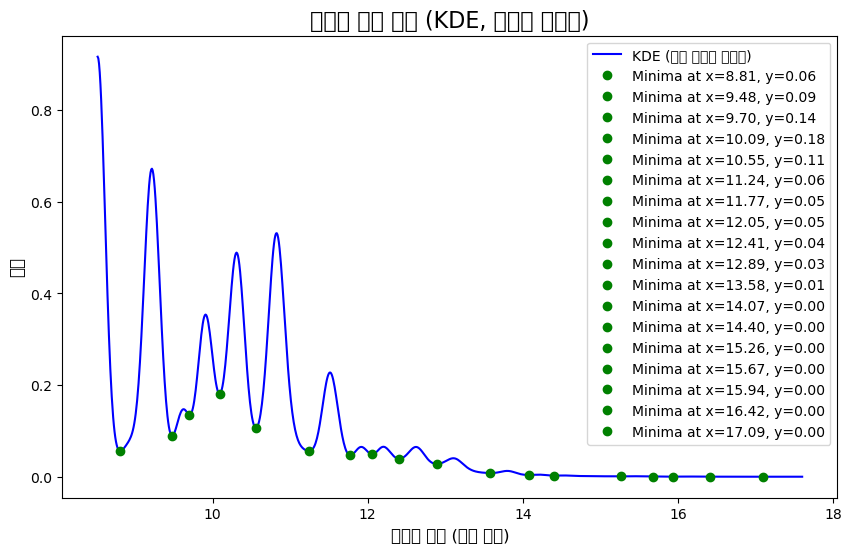

In [55]:
# 전처리 데이터의 서비스가격 분포 확인하기
df['서비스가격_로그'] = np.log(df['서비스가격'])

# NaN 또는 inf 값 제거
data = df['서비스가격_로그'].dropna()  # NaN 값 제거
data = data[np.isfinite(data)]  # inf 값 제거

# KDE 계산
kde = gaussian_kde(data, bw_method='scott')

# x 값 설정 (범위와 간격 설정)
x = np.linspace(data.min(), data.max(), 1000)

# KDE 값 계산
kde_values = kde(x)

# 최솟값 찾기 (KDE 값의 부호 반전 후 모든 봉우리 찾기)
minima_idx = signal.find_peaks(-kde_values)[0]  # 반전된 값에서 모든 최소값 찾기

# 모든 최솟값만 출력
# print("모든 최솟값:")
# for idx in minima_idx:
#     print(f"최솟값: x={x[idx]:.2f}, y={kde_values[idx]:.2f}")

# 그래프 시각화
plt.figure(figsize=(10, 6))

# KDE 그래프 그리기
plt.plot(x, kde_values, color="blue", label="KDE (로그 변환된 데이터)")

# 모든 최솟값 위치 표시
for idx in minima_idx:
    plt.plot(x[idx], kde_values[idx], 'go', label=f'Minima at x={x[idx]:.2f}, y={kde_values[idx]:.2f}')

# 제목 및 레이블
plt.title('서비스 가격 분포 (KDE, 전처리 데이터)', fontsize=16)
plt.xlabel('서비스 가격 (로그 변환)', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.legend()
plt.show()

# # 역로그 변환하여 실제 서비스 가격 출력
# print(f"\n모든 최솟값 (실제 서비스 가격):")
# for idx in minima_idx:
#     original_price = np.exp(x[idx])  # 역 로그 취하기
#     print(f"최솟값: x={x[idx]:.2f}, 역로그 변환된 서비스 가격={original_price:.2f}")

### 원 서비스 데이터에서는 구분지을 수 있는 변곡점이 보인다.
### 전처리 데이터에서는 구분지을 지표가 명확하지 않다. 
### 따라서 아래에서는 원 서비스 데이터의 변곡점을 기준으로 전처리 데이터의 가격 범주를 3갈래로 나눠 처리한다. 
### 가격 기준 : 16436.95, 185259.20

## 테이블 분할 (3과 연관된 컬럼들만)

In [56]:
df.columns

Index(['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '서비스명', '판매자',
       '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호', '총금액', '매출', '사용기기',
       '사용OS', '유입경로', '회원상태', '거주지', '연령', '서비스총구매수', '총구매금액', '총수정요청수',
       '총추가결제금액', '판매수', '판매자ID', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '서비스가격_로그'],
      dtype='object')

In [57]:
df_service.columns

Index(['서비스명', '판매자', '서비스가격', '평점', '대분류', '서비스번호', '판매수', '서비스가격_로그'], dtype='object')

In [58]:
# df_service = pd.read_csv('C:/Users/campus4D046/Desktop/folder/statistic/data/Service_Data.csv')
# df_service = df_service.dropna()

# df_service = df_service.groupby(['서비스명', '판매자', '서비스가격', '평점', '대분류', '서비스번호'],as_index=False).agg({'판매수': 'sum'})

In [59]:
# # '서비스가격', '서비스번호', '거래취소여부', '매출' 컬럼 선택
# df_selected = df[['서비스가격', '서비스번호', '거래취소여부', '매출']]

# # '서비스번호'별로 그룹화하여 거래 취소 수와 전체 거래 수를 계산
# df_grouped = df_selected.groupby('서비스번호').agg(
#     취소된_거래수=('거래취소여부', lambda x: (x == 1).sum()),  # 거래취소여부가 1인 취소된 거래 수
#     전체_거래수=('거래취소여부', 'count'),                    # 서비스번호 별 전체 거래 수
# ).reset_index()

# # 거래취소율 계산
# df_grouped['거래취소율'] = (df_grouped['취소된_거래수'] / df_grouped['전체_거래수']) * 100

# # 서비스번호별 평균 매출 계산 (매출 평균)
# df_grouped['평균매출'] = df.groupby('서비스번호')['매출'].mean().values

# # 서비스번호별 가격은 첫 번째 값만 가져오기 (서비스번호별 가격은 동일하므로 첫 번째 값만 사용)
# df_grouped['서비스가격'] = df.groupby('서비스번호')['서비스가격'].first().values

# # 최종적으로 필요한 컬럼만 선택하여 df_3 생성
# df_4 = df_grouped[['서비스가격', '서비스번호', '거래취소율', '평균매출']]

# df_4.head() # 3의 파생가설에서 사용할 테이블(df_3에 평균매출 컬럼 추가함)

In [60]:
df_selected = df[['서비스가격', '서비스번호', '거래취소여부']]

df_grouped = df_selected.groupby('서비스번호').agg(
    취소된_거래수=('거래취소여부', lambda x: (x == 1).sum()),  # 거래취소여부가 1인 취소된 거래 수
    전체_거래수=('거래취소여부', 'count')                    # 서비스번호 별 전체 거래 수
).reset_index()

# 거래취소율 계산
df_grouped['거래취소율'] = (df_grouped['취소된_거래수'] / df_grouped['전체_거래수']) * 100

# 서비스명별 가격은 첫 번째 값만 가져오기 (서비스번호별 가격은 동일하므로 첫 번째 값만 사용)
df_grouped['서비스가격'] = df.groupby('서비스번호')['서비스가격'].first().values

df_3 = df_grouped[['서비스가격', '서비스번호', '거래취소율']]

df_3 # 3번째 가설에서 사용할 테이블 이름

,서비스가격,서비스번호,거래취소율
0,5000.0,2102.0,1.259446
1,10000.0,2103.0,2.435897
2,50000.0,2105.0,2.087683
3,5000.0,2106.0,3.602058
4,5000.0,2107.0,1.207938
...,...,...,...
2857,850000.0,6488.0,0.000000
2858,550000.0,6489.0,0.000000
2859,380000.0,6494.0,0.000000
2860,33000.0,6495.0,0.000000


In [61]:
df['서비스번호'].nunique()

2862

In [62]:
df_3['서비스번호'].nunique()

2862

In [63]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서비스가격   2862 non-null   float64
 1   서비스번호   2862 non-null   float64
 2   거래취소율   2862 non-null   float64
dtypes: float64(3)
memory usage: 67.2 KB


In [64]:
df_3['서비스가격'] = df_3['서비스가격'].astype('int64') #float64 -> int64

C:\Users\woota\AppData\Local\Temp\ipykernel_2112\4119620248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['서비스가격'] = df_3['서비스가격'].astype('int64') #float64 -> int64


In [65]:
df_3['서비스번호'] = df_3['서비스번호'].astype('int64') #float64 -> int64

C:\Users\woota\AppData\Local\Temp\ipykernel_2112\2839544847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['서비스번호'] = df_3['서비스번호'].astype('int64') #float64 -> int64


In [66]:
df_3

,서비스가격,서비스번호,거래취소율
0,5000,2102,1.259446
1,10000,2103,2.435897
2,50000,2105,2.087683
3,5000,2106,3.602058
4,5000,2107,1.207938
...,...,...,...
2857,850000,6488,0.000000
2858,550000,6489,0.000000
2859,380000,6494,0.000000
2860,33000,6495,0.000000


In [67]:
df_3.groupby('서비스가격').size()

서비스가격
5000        307
6000          7
7000         14
7500          1
8000         10
           ... 
12000000      1
15000000      1
16500000      2
40000000      1
44000000      1
Length: 187, dtype: int64

C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core

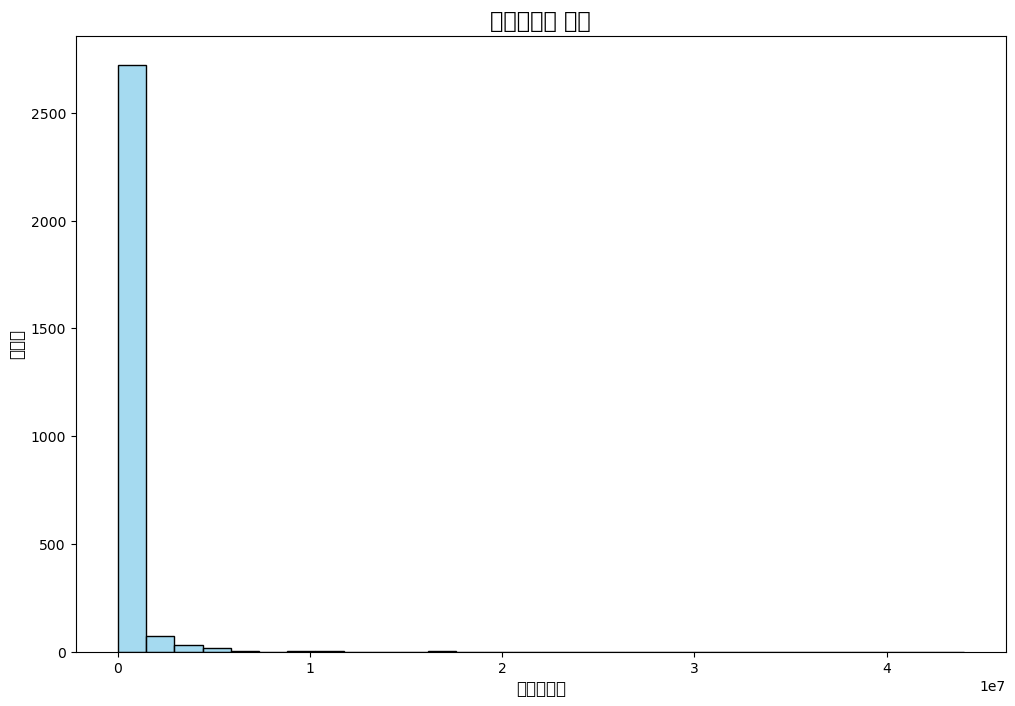

In [68]:
# 서비스가격별 갯수 히스토그램으로 시각화
plt.figure(figsize=(12, 8))
sns.histplot(df_3['서비스가격'], kde=False, color='skyblue', bins=30)

# 제목 및 레이블
plt.title('서비스가격 분포', fontsize=16)
plt.xlabel('서비스가격', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

plt.show()

C:\Users\woota\AppData\Local\Temp\ipykernel_2112\2482037868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['서비스가격_로그'] = np.log(df_3['서비스가격'])
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic

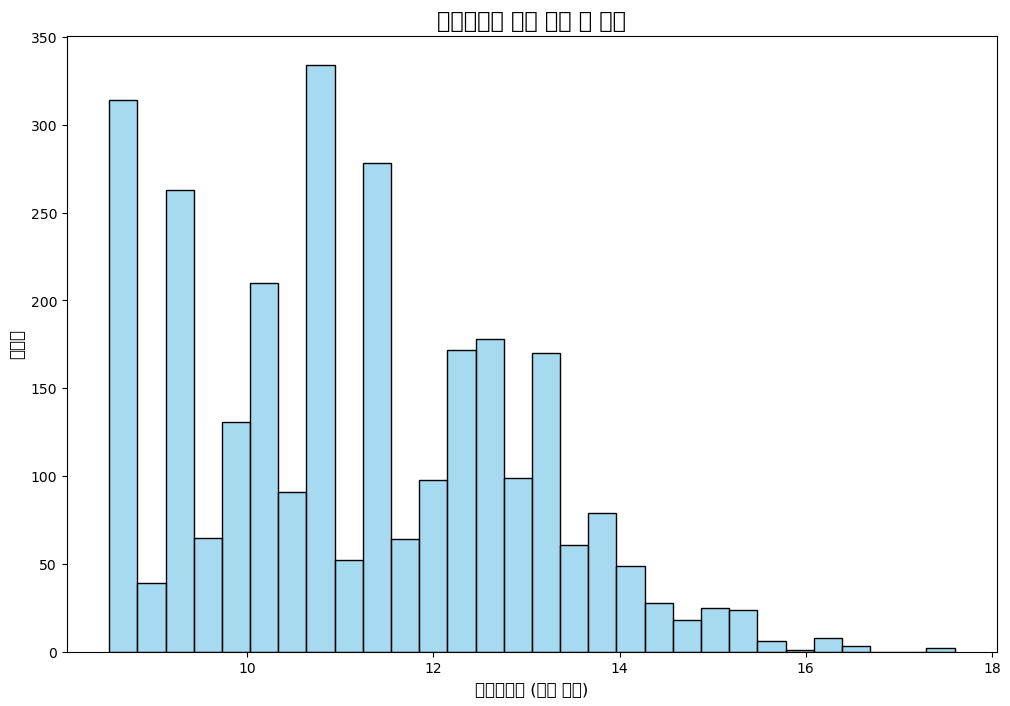

In [69]:
# 서비스가격 로그 변환
df_3['서비스가격_로그'] = np.log(df_3['서비스가격'])

# 서비스가격_로그 히스토그램으로 시각화
plt.figure(figsize=(12, 8))
sns.histplot(df_3['서비스가격_로그'], kde=False, color='skyblue', bins=30)

# 제목 및 레이블
plt.title('서비스가격 로그 변환 후 분포', fontsize=16)
plt.xlabel('서비스가격 (로그 변환)', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

plt.show()


## 분포확인 끝. 모델링 검증

In [70]:
# 범주 2와 범주 3의 연결 지점이 매끄럽지 않아 기준2를 왼쪽으로 이동시켜 적정 지점을 찾음 
# min_price=16436.95
# max_price=185259.20

min_price=16436.95
max_price=105259.20

C:\Users\woota\AppData\Local\Temp\ipykernel_2112\3353892255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['서비스가격_로그'] = np.log(df_3['서비스가격'])
C:\Users\woota\AppData\Local\Temp\ipykernel_2112\3353892255.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_3.groupby('가격_구간').size())
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Use

가격_구간
저가     681
중가    1096
고가    1085
dtype: int64


C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


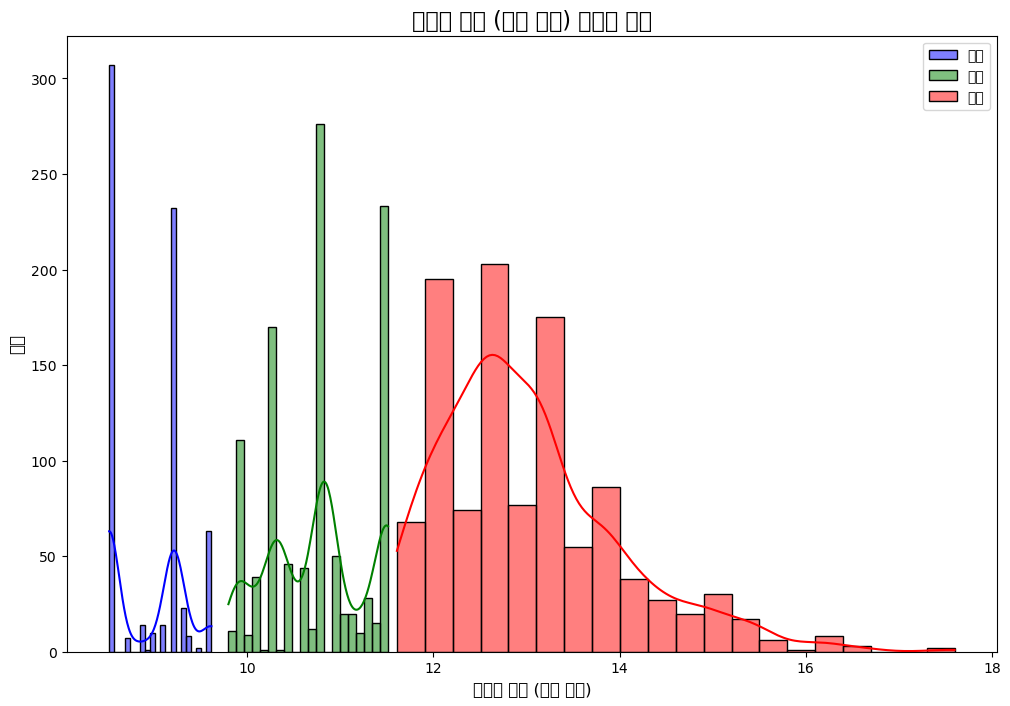

In [71]:
# 서비스가격 로그 변환
df_3['서비스가격_로그'] = np.log(df_3['서비스가격'])

# 구간 나누기 (로그 변환된 값으로)
log_min_price = np.log(min_price)
log_max_price = np.log(max_price)

# 로그 변환된 가격을 구간으로 나누기
df_3['가격_구간'] = pd.cut(df_3['서비스가격_로그'], bins=[0, log_min_price, log_max_price, np.inf], labels=['저가', '중가', '고가'])

# 구간별 데이터 확인
print(df_3.groupby('가격_구간').size())

# 구간별 서비스가격_로그 분포 시각화
plt.figure(figsize=(12, 8))

sns.histplot(df_3[df_3['가격_구간'] == '저가']['서비스가격_로그'], kde=True, color='blue', label='저가', bins=20)
sns.histplot(df_3[df_3['가격_구간'] == '중가']['서비스가격_로그'], kde=True, color='green', label='중가', bins=20)
sns.histplot(df_3[df_3['가격_구간'] == '고가']['서비스가격_로그'], kde=True, color='red', label='고가', bins=20)

# 제목 및 레이블
plt.title('서비스 가격 (로그 변환) 구간별 분포', fontsize=16)
plt.xlabel('서비스 가격 (로그 변환)', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.legend()
plt.show()


In [72]:
df_3['서비스가격'].min()

5000

In [73]:
df_3['서비스가격'].max()

44000000

In [125]:
from scipy.stats import levene

group1 = df_3[df_3['가격구간'] == '저가']['거래취소율']
group2 = df_3[df_3['가격구간'] == '중가']['거래취소율']
group3 = df_3[df_3['가격구간'] == '고가']['거래취소율']

# Levene’s Test 수행
stat, p_value = levene(group1, group2, group3)

# 결과 출력
print(f"Levene's Test: 통계량={stat:.3f}, p-value={p_value:.5f}")

# 해석
if p_value < 0.05:
    print("귀무가설 기각: 두 그룹의 분산이 다릅니다 (등분산성 없음).")
else:
    print("귀무가설 채택: 두 그룹의 분산이 같습니다 (등분산성 있음).")


Levene's Test: 통계량=7.028, p-value=0.00090
귀무가설 기각: 두 그룹의 분산이 다릅니다 (등분산성 없음).


In [128]:
import pandas as pd
import pingouin as pg

# Welch's ANOVA 수행
anova_result = pg.welch_anova(
    dv='거래취소율', between='가격구간', 
    data=pd.DataFrame({
        '거래취소율': pd.concat([group1, group2, group3]),
        '가격구간': ['저가'] * len(group1) + ['중가'] * len(group2) + ['고가'] * len(group3)
    })
)

# F-statistic과 p-value 추출
f_statistic = anova_result['F'].values[0]
p_value = anova_result['p-unc'].values[0]

# 결과 출력 (일반 ANOVA 형식으로)
print(f"F-statistic: {f_statistic:.6f}")
print(f"P-value: {p_value:.6e}")

# 해석
if p_value < 0.05:
    print("가격 구간 간에 거래취소율의 유의미한 차이가 있습니다.")
else:
    print("가격 구간 간에 거래취소율의 유의미한 차이가 없습니다.")


F-statistic: 8.943690
P-value: 1.361221e-04
가격 구간 간에 거래취소율의 유의미한 차이가 있습니다.


In [76]:
df_3.groupby('가격구간')['거래취소율'].mean()

C:\Users\woota\AppData\Local\Temp\ipykernel_2112\684457322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_3.groupby('가격구간')['거래취소율'].mean()


가격구간
저가    1.552913
중가    2.676382
고가    1.963475
Name: 거래취소율, dtype: float64

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA를 위한 OLS 모델 만들기
model = ols('거래취소율 ~ 가격구간', data=df_3).fit()

# ANOVA 분석 (분산 분석)
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA 분석 결과:")
print(anova_table)

# Tukey HSD 사후 분석
tukey_result = pairwise_tukeyhsd(df_3['거래취소율'], df_3['가격구간'])

# Tukey 결과를 DataFrame으로 보기 좋게 출력
tukey_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])
print("\nTukey HSD 사후 분석 결과:")
tukey_df


ANOVA 분석 결과:
                 sum_sq      df         F    PR(>F)
가격구간         583.852483     2.0  7.028253  0.000902
Residual  118751.713962  2859.0       NaN       NaN

Tukey HSD 사후 분석 결과:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,고가,저가,-0.4106,0.3936,-1.1494,0.3283,False
1,고가,중가,0.7129,0.0266,0.0657,1.3601,True
2,저가,중가,1.1235,0.0010,0.3861,1.8609,True


## 나눈 범주 간 서비스 가격 분포가 고른지 확인 - 평균값, 중앙값으로

C:\Users\woota\AppData\Local\Temp\ipykernel_2112\2284038196.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_3.groupby('가격_구간')['서비스가격_로그'].mean()
C:\Users\woota\AppData\Local\Temp\ipykernel_2112\2284038196.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df_3.groupby('가격_구간')['서비스가격_로그'].median()
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaco

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


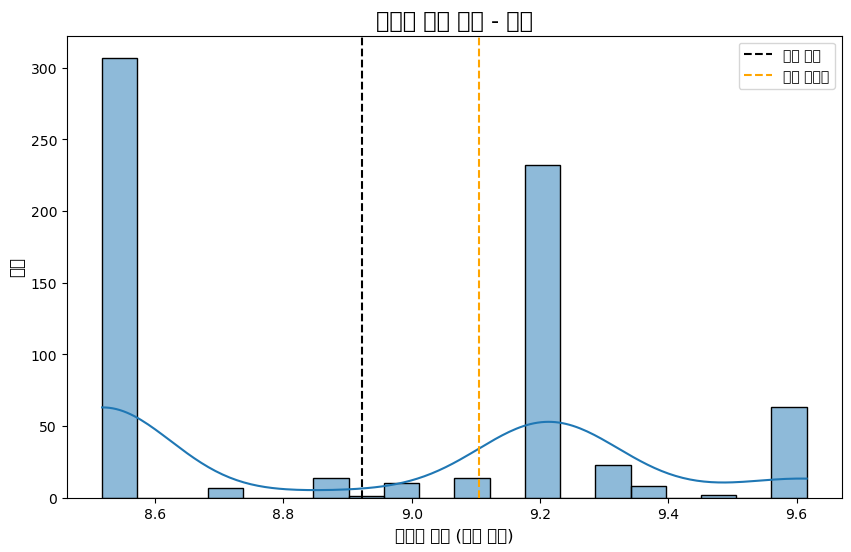

C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\woota\anaconda3\Lib\site-packages\IPython\core

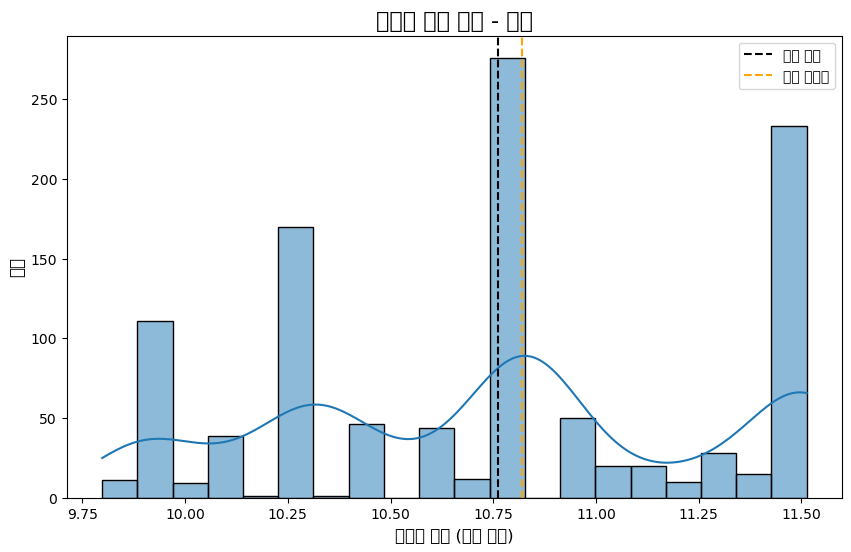

C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


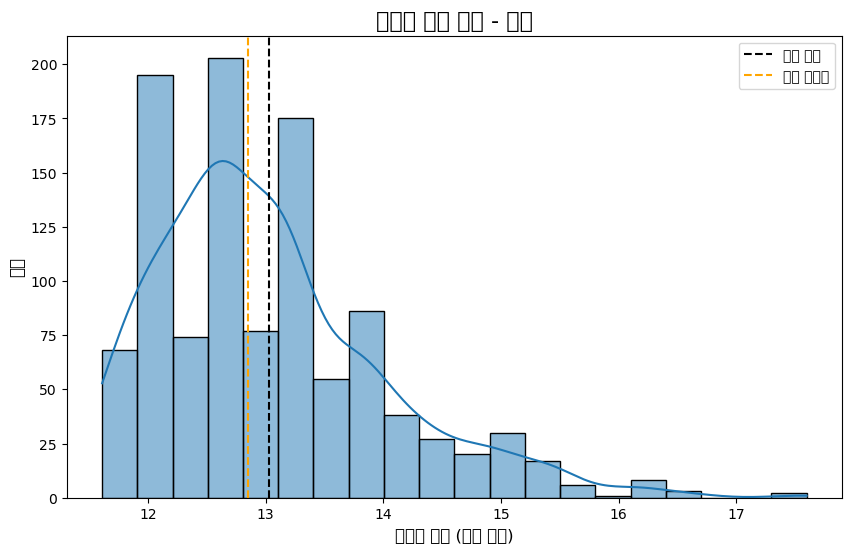

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 서비스가격 로그 변환
df_3['서비스가격_로그'] = np.log(df_3['서비스가격'])

# 구간 나누기 (로그 변환된 값으로)
log_min_price = np.log(min_price)
log_max_price = np.log(max_price)

# 로그 변환된 가격을 구간으로 나누기
df_3['가격_구간'] = pd.cut(df_3['서비스가격_로그'], bins=[0, log_min_price, log_max_price, np.inf], labels=['저가', '중가', '고가'])

# 구간별 평균값과 중앙값 계산
mean_values = df_3.groupby('가격_구간')['서비스가격_로그'].mean()
median_values = df_3.groupby('가격_구간')['서비스가격_로그'].median()

# 각 구간별로 히스토그램을 별도로 그리기
for i, label in enumerate(['저가', '중가', '고가']):
    plt.figure(figsize=(10, 6))  # 각 그래프를 별도로 띄우기 위해 figure 크기 설정
    
    # 해당 구간 데이터의 히스토그램
    sns.histplot(df_3[df_3['가격_구간'] == label]['서비스가격_로그'], kde=True, bins=20)
    
    # 평균값, 중앙값 표시
    plt.axvline(mean_values[label], color='black', linestyle='dashed', label=f'{label} 평균')
    plt.axvline(median_values[label], color='orange', linestyle='dashed', label=f'{label} 중앙값')

    # 제목 및 레이블
    plt.title(f'서비스 가격 분포 - {label}', fontsize=16)
    plt.xlabel('서비스 가격 (로그 변환)', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    
    # 레전드
    plt.legend()
    
    plt.show()  # 각 구간별로 그래프를 따로 출력

# 3의 파생가설 H1) 서비스가격에 따라 / 매출에 차이가 있을 것이다.
### p-value 도출 결과 유의미한 차이 있음을 확인, 사후검정 진행함.

In [79]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 첫 번째 코드에서 사용하는 df 데이터프레임을 불러옵니다.
# 이 부분은 이미 제공한 데이터프레임이므로 여기에 맞는 데이터를 넣어야 합니다.
# 예: df = pd.read_csv('경로')

# 가격 구간 설정
df['서비스가격_로그'] = np.log(df['서비스가격'])
bins = [df['서비스가격_로그'].min(), log_min_price, log_max_price, df['서비스가격_로그'].max()]
labels = ['저가', '중가', '고가']
df['가격구간'] = pd.cut(df['서비스가격_로그'], bins=bins, labels=labels, include_lowest=True)

# 2. df_3에 매출 컬럼 추가 (매출은 df에서 가져와서 합침)
df_3['매출'] = df.groupby('서비스번호')['매출'].transform('mean')

# 3. 가격 구간별 매출을 추출 (이 부분에서 가격 구간을 기준으로 매출을 그룹화)
df_3_grouped = df_3.groupby('가격구간', observed=False)['매출'].mean()

# 4. 아노바 분석 수행 (각 구간별 매출이 동일한지 확인)
group1 = df_3[df_3['가격구간'] == '저가']['매출']
group2 = df_3[df_3['가격구간'] == '중가']['매출']
group3 = df_3[df_3['가격구간'] == '고가']['매출']

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# 5. ANOVA 결과 확인 후 사후 분석 (Tukey's HSD)
if p_value < 0.05:
    print(f"가격 구간별 매출에 유의미한 차이가 있습니다. (p-value = {p_value})")
    
    # Tukey's HSD Test
    tukey = pairwise_tukeyhsd(endog=df_3['매출'], groups=df_3['가격구간'], alpha=0.05)
    
    # Tukey's HSD 결과 출력
    print(tukey.summary())
else:
    print(f"가격 구간별 매출에 유의미한 차이가 없습니다. (p-value = {p_value})")


가격 구간별 매출에 유의미한 차이가 있습니다. (p-value = 2.626851974655752e-10)
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    고가     저가 -26092.7706    0.0  -35312.296 -16873.2453   True
    고가     중가 -12063.3769 0.0014 -20139.6189  -3987.1349   True
    저가     중가  14029.3937  0.001   4827.7266  23231.0608   True
---------------------------------------------------------------


In [80]:
min_value = df_3['거래취소율'].min()
max_value = df_3['거래취소율'].max()

print(f"거래취소율 최소값: {min_value}")
print(f"거래취소율 최대값: {max_value}")

거래취소율 최소값: 0.0
거래취소율 최대값: 100.0


C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\woota\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont

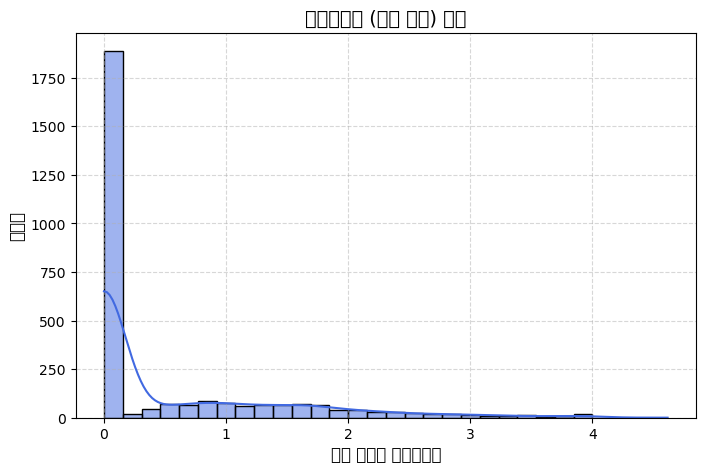

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 거래취소율에 로그 변환 적용 (0 이상의 값만 처리)
df_3['거래취소율_로그'] = np.log1p(df_3['거래취소율'])  # log1p는 0을 포함한 값에 안전하게 적용됨

plt.figure(figsize=(8, 5))

# 로그 변환 후 히스토그램 + KDE 그래프
sns.histplot(df_3['거래취소율_로그'], bins=30, kde=True, color='royalblue')

plt.title('거래취소율 (로그 변환) 분포', fontsize=14)
plt.xlabel('로그 변환된 거래취소율', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [82]:
df_3_100 = df_3[df_3['거래취소율'] == 100]

# 결과 출력
print(f"거래취소율이 100인 행의 개수: {len(df_3_100)}")
print(df_3_100)


거래취소율이 100인 행의 개수: 1
       서비스가격  서비스번호  거래취소율   서비스가격_로그 가격_구간 가격구간             매출  거래취소율_로그
2482  100000   5929  100.0  11.512925    중가   중가  187807.223816  4.615121
